In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')

In [2]:
# Get a quick overview of the structure and content of our DataFrame
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
# Ensure that the data types of each column are appropriate for the analysis
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [7]:
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

print(gender_count)


   Gender  Count
0    Male   2652
1  Female   1248


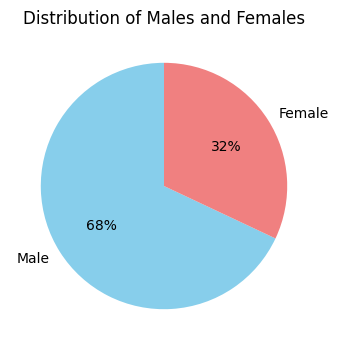

In [8]:
# Plotting a pie chart to better understand the distribution of females and males.

plt.figure(figsize=(8, 4))
plt.pie(gender_count['Count'], labels=gender_count['Gender'], autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Males and Females')
plt.show()


In [9]:
# Create age groups for consumer behavior analysis

age_bins = [18, 35, 50, 70]
age_labels = ['18-35', '36-50', '51-70']

# Apply the cut function to create the 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filter the DataFrame for males and females separately
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

In [10]:
# Group by 'Age Group' and sum the 'Purchase Amount (USD)'
male_purchase_sum = male_df.groupby('Age Group')['Purchase Amount (USD)'].sum()
female_purchase_sum = female_df.groupby('Age Group')['Purchase Amount (USD)'].sum()

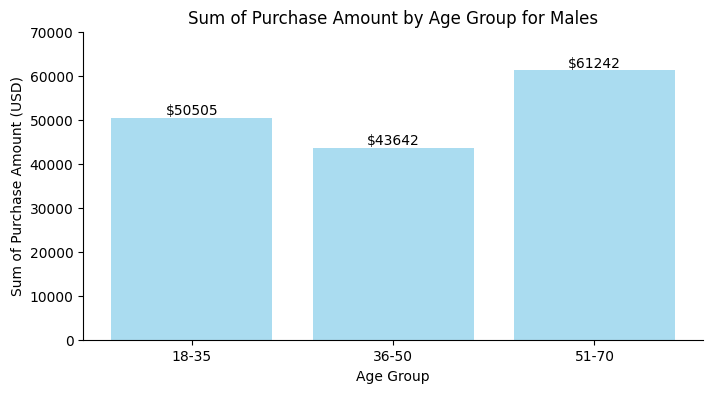

In [11]:

# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Bar chart for males
bars = plt.bar(male_purchase_sum.index, male_purchase_sum, label='Males', color='skyblue', alpha=0.7)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Sum of Purchase Amount (USD)')
plt.title('Sum of Purchase Amount by Age Group for Males')
plt.ylim(0, 70000)

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${int(yval)}", ha='center', va='bottom')

    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


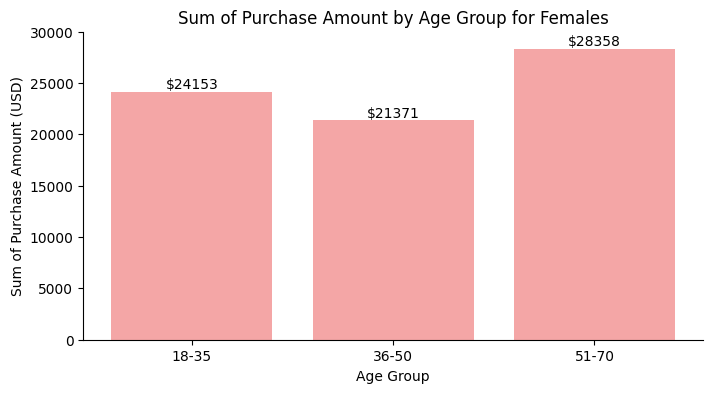

In [12]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))

# Bar chart for females
bars = plt.bar(female_purchase_sum.index, female_purchase_sum, label='Females', color='lightcoral', alpha=0.7)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Sum of Purchase Amount (USD)')
plt.title('Sum of Purchase Amount by Age Group for Females')
plt.ylim(0, 30000)


# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${int(yval)}", ha='center', va='bottom')

    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()


In [13]:
# Group by 'Age Group' for males and calculate count and sum of 'Purchase Amount (USD)'
male_age_group_stats = male_df.groupby('Age Group')['Purchase Amount (USD)'].agg(['count', 'sum']).sort_index()

# Group by 'Age Group' for females and calculate count and sum of 'Purchase Amount (USD)'
female_age_group_stats = female_df.groupby('Age Group')['Purchase Amount (USD)'].agg(['count', 'sum']).sort_index()

# Display the results
print("Stats for Males:")
print(male_age_group_stats)

print("\nStats for Females:")
print(female_age_group_stats)


Stats for Males:
           count    sum
Age Group              
18-35        848  50505
36-50        733  43642
51-70       1026  61242

Stats for Females:
           count    sum
Age Group              
18-35        393  24153
36-50        367  21371
51-70        466  28358


In [14]:
male_purchase_count = male_df.groupby('Age Group')['Purchase Amount (USD)'].count()
female_purchase_count = female_df.groupby('Age Group')['Purchase Amount (USD)'].count()

# Calculate average spend per purchase
male_avg_spend_per_purchase = male_purchase_sum / male_purchase_count
female_avg_spend_per_purchase = female_purchase_sum / female_purchase_count

# Format average spend per purchase as currency
male_avg_spend_per_purchase_formatted = male_avg_spend_per_purchase.map('${:,.2f}'.format)
female_avg_spend_per_purchase_formatted = female_avg_spend_per_purchase.map('${:,.2f}'.format)

In [15]:
male_avg_spend_per_purchase_formatted

Age Group
18-35    $59.56
36-50    $59.54
51-70    $59.69
Name: Purchase Amount (USD), dtype: object

In [16]:
female_avg_spend_per_purchase_formatted

Age Group
18-35    $61.46
36-50    $58.23
51-70    $60.85
Name: Purchase Amount (USD), dtype: object

In [17]:
# Create a new DataFrame grouped by 'Location' and sorted by count in descending order
location_count = df['Location'].value_counts().reset_index()
location_count.columns = ['Location', 'Count']
location_count = location_count.sort_values(by='Count', ascending=False)

print(location_count)


          Location  Count
0          Montana     96
1       California     95
2            Idaho     93
3         Illinois     92
4          Alabama     89
5        Minnesota     88
6         Nebraska     87
7         New York     87
8           Nevada     87
9         Maryland     86
10        Delaware     86
11         Vermont     85
12       Louisiana     84
13    North Dakota     83
15   West Virginia     81
16      New Mexico     81
14        Missouri     81
17     Mississippi     80
18         Indiana     79
19         Georgia     79
20        Kentucky     79
21        Arkansas     79
22  North Carolina     78
23     Connecticut     78
27           Texas     77
28           Maine     77
25            Ohio     77
26       Tennessee     77
24        Virginia     77
29  South Carolina     76
30        Colorado     75
31        Oklahoma     75
32       Wisconsin     75
33          Oregon     74
34    Pennsylvania     74
35      Washington     73
36        Michigan     73
38   Massach

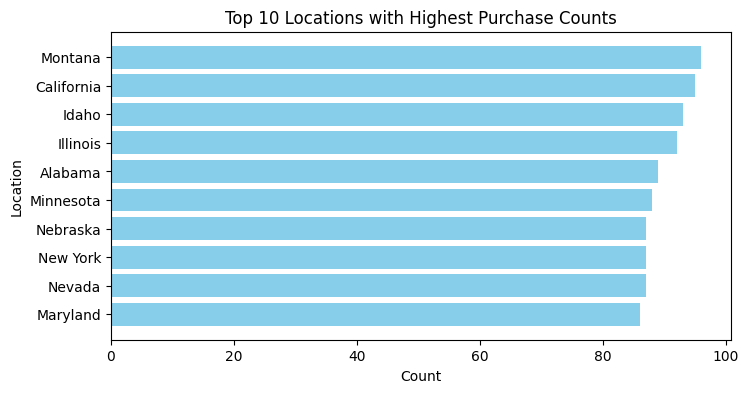

In [18]:
top_10_locations = location_count.head(10)

plt.figure(figsize=(8, 4))
plt.barh(top_10_locations['Location'], top_10_locations['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 10 Locations with Highest Purchase Counts')
plt.gca().invert_yaxis()
plt.show()

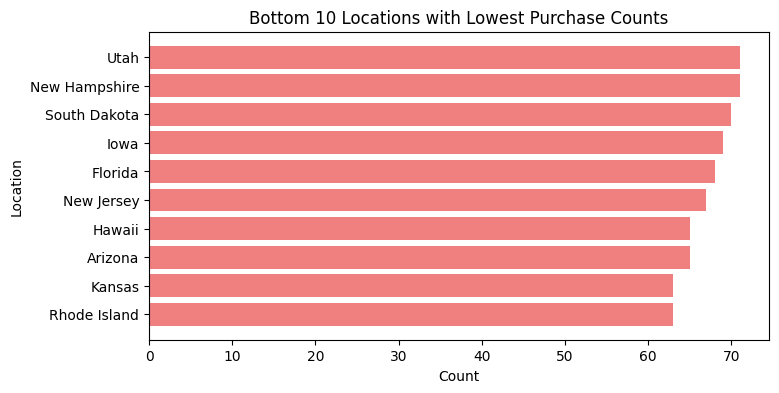

In [19]:
bottom_10_locations = location_count.tail(10)

plt.figure(figsize=(8, 4))
plt.barh(bottom_10_locations['Location'], bottom_10_locations['Count'], color='lightcoral')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Bottom 10 Locations with Lowest Purchase Counts')
plt.gca().invert_yaxis()
plt.show()


In [20]:
# Create a new DataFrame grouped by 'Season' and sum of purchases
season_purchase_sum = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
season_purchase_sum.columns = ['Season', 'Total Purchase Amount']

# Display the season_purchase_sum DataFrame
print(season_purchase_sum)


   Season  Total Purchase Amount
0    Fall                  60018
1  Spring                  58679
2  Summer                  55777
3  Winter                  58607


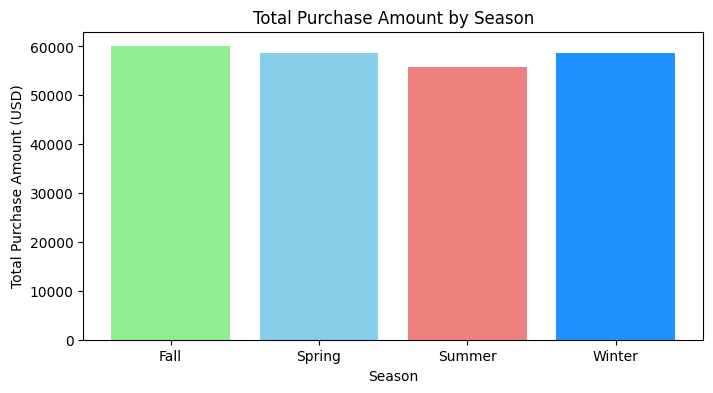

In [21]:
# Define the order of seasons and corresponding colors
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_colors = {'Spring': 'skyblue', 'Summer': 'lightcoral', 'Fall': 'lightgreen', 'Winter': 'dodgerblue'}

# Assuming you have the season_purchase_sum DataFrame
plt.figure(figsize=(8, 4))
plt.bar(season_purchase_sum['Season'], season_purchase_sum['Total Purchase Amount'], color=[season_colors[season] for season in season_purchase_sum['Season']])
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Season')
plt.show()


In [22]:
# Create a new DataFrame grouped by 'Category' with sum of purchases
category_purchase_sum = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
category_purchase_sum.columns = ['Category', 'Total Purchase Amount']

# Sort the DataFrame by the sum of purchase amounts
category_purchase_sum = category_purchase_sum.sort_values(by='Total Purchase Amount', ascending=False)

# Display the category_purchase_sum DataFrame
print(category_purchase_sum)


      Category  Total Purchase Amount
1     Clothing                 104264
0  Accessories                  74200
2     Footwear                  36093
3    Outerwear                  18524


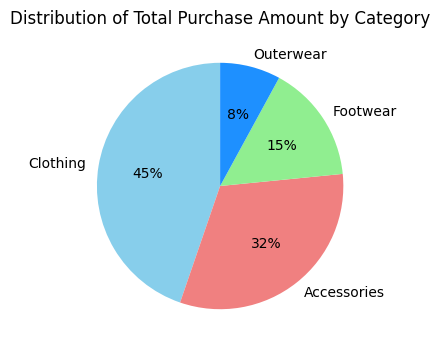

In [23]:
plt.figure(figsize=(8, 4))
plt.pie(category_purchase_sum['Total Purchase Amount'], labels=category_purchase_sum['Category'], autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'dodgerblue'])
plt.title('Distribution of Total Purchase Amount by Category')
plt.show()


In [24]:
# Create a new DataFrame grouped by 'Gender' and 'Category' with sum of purchases
gender_category_purchase_sum = df.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()
gender_category_purchase_sum.columns = ['Gender', 'Category', 'Total Purchase Amount']

# Display the gender_category_purchase_sum DataFrame
print(gender_category_purchase_sum)


   Gender     Category  Total Purchase Amount
0  Female  Accessories                  23819
1  Female     Clothing                  33636
2  Female     Footwear                  11835
3  Female    Outerwear                   5901
4    Male  Accessories                  50381
5    Male     Clothing                  70628
6    Male     Footwear                  24258
7    Male    Outerwear                  12623


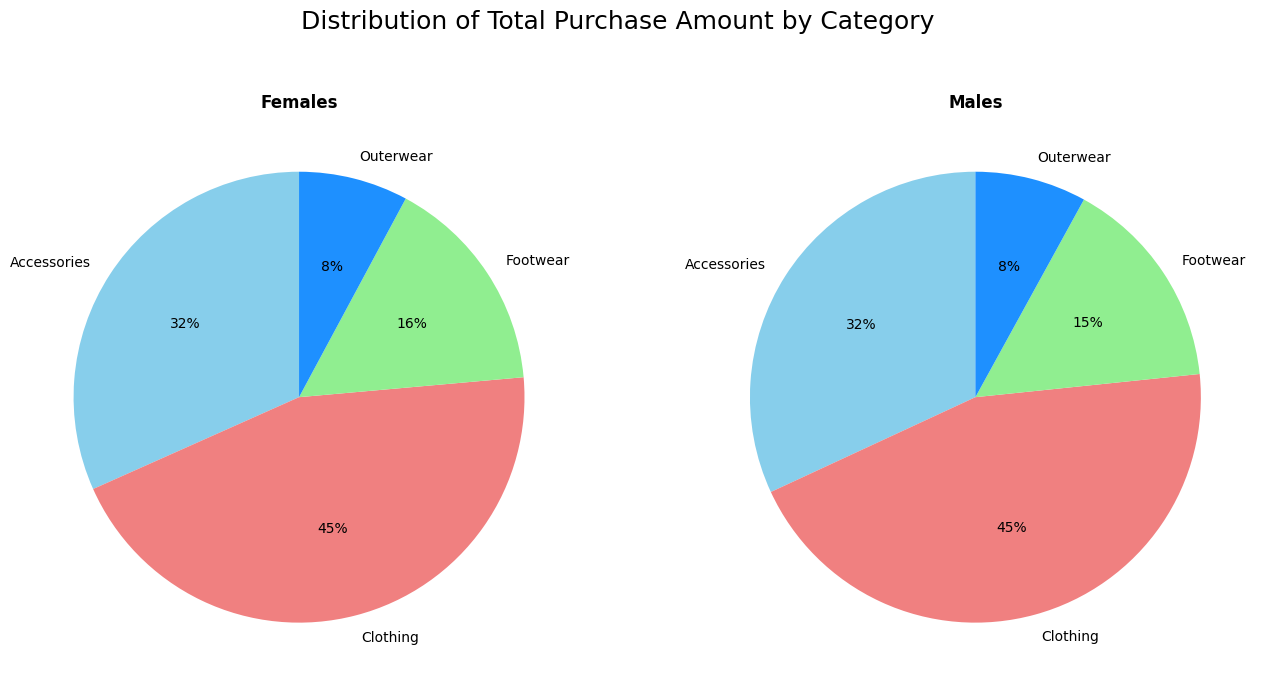

In [25]:
# Assuming you have the gender_category_purchase_sum DataFrame
female_purchase_sum = gender_category_purchase_sum[gender_category_purchase_sum['Gender'] == 'Female']
male_purchase_sum = gender_category_purchase_sum[gender_category_purchase_sum['Gender'] == 'Male']

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Females
axes[0].pie(female_purchase_sum['Total Purchase Amount'], labels=female_purchase_sum['Category'], autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'dodgerblue'])
axes[0].set_title('Females', fontweight='bold')

# Pie chart for Males
axes[1].pie(male_purchase_sum['Total Purchase Amount'], labels=male_purchase_sum['Category'], autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'dodgerblue'])
axes[1].set_title('Males', fontweight='bold')

plt.suptitle('Distribution of Total Purchase Amount by Category', fontsize=18)

plt.show()
